# Introduction

In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

I will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, I have analyzed, prepared, and ploted data. Visualizations will help the financial analysts asses the risk of the Netflix stock.


Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Let's get our notebook ready for visualizing! Importing the modules that you'll be using in this project:


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Let's load the datasets and inspect them.

Loading **NFLX.csv** into a DataFrame called `netflix_stocks`.
Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [3]:
netflix_stocks = pd.read_csv('NFLX.csv')
print(netflix_stocks.head())
print(netflix_stocks.tail())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  
          Date        Open        High         Low       Close   Adj Close  \
7   2017-08-01  182.490005  184.619995  164.229996  174.710007  174.710007   
8   2017-09-01  175.550003  189.949997  172.440002  181.350006  181.350006   
9   2017-10-01  182.110001  204.380005  176.580002  196.429993  196.429993   
10  2017-11-01  197.240005  202.479996  184.320007  195.509995  195.509995   
11  2017-12-01  186.990005  194.490005  178.380005  191.9

Loading **DJI.csv** into a DataFrame called `dowjones_stocks`.


In [4]:
dowjones_stocks = pd.read_csv('DJI.csv')
print(dowjones_stocks.head())
print(dowjones_stocks.tail())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

      Adj Close      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  
          Date          Open          High           Low         Close  \
7   2017-08-01  21961.419922  22179.109375  21600.339844  21948.099609   
8   2017-09-01  21981.769531  22419.509766  21709.630859  22405.089844   
9   2017-10-01  22423.470703  23485.250000  22416.000000  23377.240234   
10  2017-11-01  23442.900391  24327.820313  23242.750000  24272.349609   
11  2017-12

Loading **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`.

In [5]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
print(netflix_stocks_quarterly.head())
print(netflix_stocks_quarterly.tail())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   

     Volume Quarter  
0   9437900      Q1  
1   7843600      Q1  
2  10185500      Q1  
3  10657900      Q1  
4   5766900      Q1  
           Date        Open        High         Low       Close   Adj Close  \
246  2017-12-22  188.330002  190.949997  186.800003  189.940002  189.940002   
247  2017-12-26  189.779999  189.940002  186.399994  187.759995  187.759995   
248  2017-12-27  187.800003  188.100006  185.220001  186.240005  186.240005   
249  2017-12-28  187.179993  194.490005  186.850006  192.710007  192.710007   
250  2017-

## Step 3

Let's learn more about our data.
 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 

## Step 4

The term Adj Close is a confusing term if you don't read the Yahoo Documentation. In Yahoo, Adj Close is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to Adj Close to Price so that it is easier to work with the data. 

In [8]:
netflix_stocks.rename(columns={'Adj Close':'Price'}, inplace=True)

In [9]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [12]:
netflix_stocks_quarterly.rename(columns={'Adj Close':'Price'}, inplace=True)
dowjones_stocks.rename(columns={'Adj Close':'Price'}, inplace=True)

## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


1. We start by creating a variable `ax` and setting it equal to `sns.violinplot()`. This will instantiate a figure and give us access to the axes through the variable name `ax`.
2. `sns.violinplot()` has the following arguments:
+ The `Quarter` column as the `x` values
+ The `Price` column as your `y` values
+ The `netflix_stocks_quarterly` dataframe as  `data`


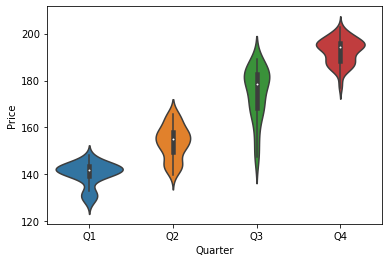

In [23]:
ax= sns.violinplot(data=netflix_stocks_quarterly, x='Quarter', y='Price')
plt.savefig("netflix_stocks_quarterly_violin.png")

## Graph Conclusions
Looking at the visualized data, we can see the increase in stocks price from quartel to quartel. 
Most of the prices fall in 140-160 and 180-200 ranges throughout the year.
The lowest price was in the beginning of the year (125) and the highest price is 205 in the end of the year 2017.
There is an obvious upward trend and imply bullish sentiment among investors.


## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

1. Ploting the actual EPS by using `x_positions` and `earnings_actual` with the `plt.scatter()` function. Assigning `red` as the color.
2. Ploting the actual EPS by using `x_positions` and `earnings_estimate` with the `plt.scatter()` function. Assigning `blue` as the color

3. Often, estimates and actual EPS are the same. To account for this,  setting  transparency  `alpha=0.5` to allow for visibility pf overlapping datapoint.


Text(0.5, 1.0, 'Earnings Per Share in Cents')

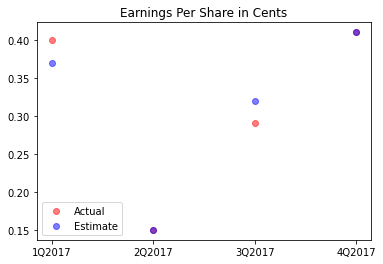

In [14]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]
plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")

## Graph Conclusions
We have charted the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We  accomplished this using a scatter chart. The drop in EPS was predicted in the second quarter of 2017 and it corresponds with actual EPS resulting in the purple dot. EPS grew in the second half of the year. Last quarter's predicted EPS equals to the actual EPS.

## Step 7

Netflix's earnings and revenue in the last four quarters better shown as side-by-side bars.
Plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. 



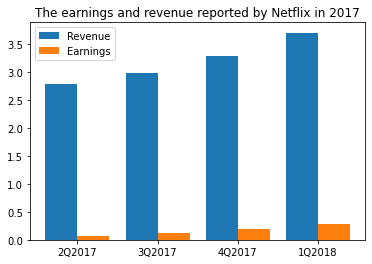

In [16]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x,revenue_by_quarter)


# Earnings
n = 2 # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars2_x, earnings_by_quarter)

plt.xticks(middle_x, quarter_labels)

plt.title('The earnings and revenue reported by Netflix in 2017')
middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.show()

## Graph Conclusions
Roughly, around 7% of the revenue constitutes earnings. 
The average net profit margin for companies in the telecommunications sector is approximately 17%. The average net profit margin can be higher or lower depending on which sector the company operates in and its amount of overhead expenses.
The Revenue follows the trend - it is gradually growing together with Earnings.

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.

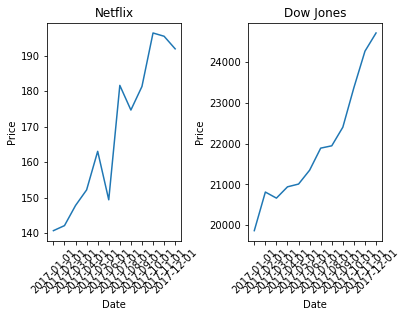

In [22]:
# Left plot Netflix
ax1 = plt.subplot(1,2,1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_title('Netflix')
ax1.set_xlabel('Date')
plt.xticks(rotation=45)
ax1.set_ylabel('Price')



# Right plot Dow Jones
ax2 = plt.subplot(1,2,2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title('Dow Jones')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
plt.xticks(rotation=45)
plt.subplots_adjust(wspace=.5)
plt.show()


We can see how did Netflix perform relative to Dow Jones Industrial Average in 2017.
On average, Netflix followed the Industrial trend.
Looking at two line graphs side-by-side, it is easy to spot which was more volatile.
Netflix price was more volatile - it fluctuates rapidly 
in a short period, hitting new highs and low.

# Step 9

Check out my presentation!
- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017
